In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7])
ys = torch.tensor([1.86, 1.31, 0.62, 0.33, 0.09, -0.67, -1.23, -1.137])

In [ ]:
def regression(my_x, my_m, my_b):
  return my_m * my_x + my_b

In [ ]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

In [ ]:
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [ ]:
def mse(my_yhat, my_y):
  sigma = torch.sum((my_yhat - my_y)**2)
  return sigma/len(my_y)

In [ ]:
C = mse(yhats, ys)
C

tensor(19.2297, grad_fn=<DivBackward0>)

In [ ]:
C.backward()
m.grad
b.grad

tensor([6.2067])

In [ ]:
optimizer = torch.optim.SGD([m, b], lr=0.01)
optimizer.step()

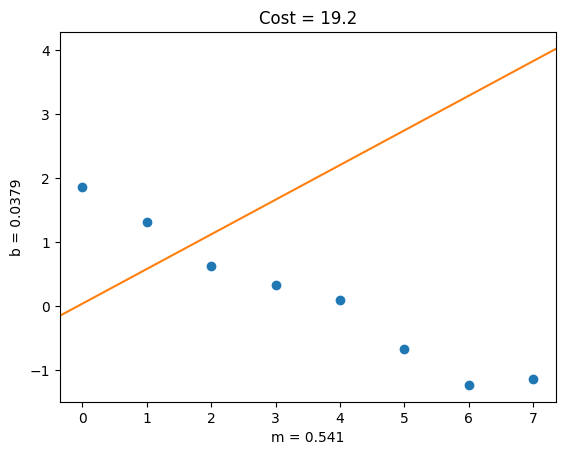

In [ ]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):

  title = 'Cost = {}'.format('%.3g' % my_C.item())
  if include_grad:
    xlabel = 'm = {}, m grad = {}'.format('%.3g' %my_m.item(), '%.3g' %my_m.grad.item())
    ylabel = 'b = {}, b grad = {}'.format('%.3g' %my_b.item(), '%.3g' %my_b.grad.item())
  else:
    xlabel = 'm = {}'.format('%.3g' %my_m.item())
    ylabel = 'b = {}'.format('%.3g' %my_b.item())

  fig, ax = plt.subplots()

  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)

  ax.scatter(my_x, my_y, zorder=3)

  x_min, x_max = ax.get_xlim()
  y_min = regression(x_min, my_m, my_b).detach().item()
  y_max = regression(x_max, my_m, my_b).detach().item()

  ax.set_xlim([x_min, x_max])
  _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')


labeled_regression_plot(xs, ys, m, b, C, include_grad=False)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Exercise Chapter 3 Topic 2_ Dataset Gaji.csv to Exercise Chapter 3 Topic 2_ Dataset Gaji.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Exercise Chapter 3 Topic 2_ Dataset Gaji.csv']))

In [ ]:
df.head()

,tahun_berkerja,gaji
0,1,3900000
1,2,4600000
2,3,3700000
3,4,4300000
4,5,3900000


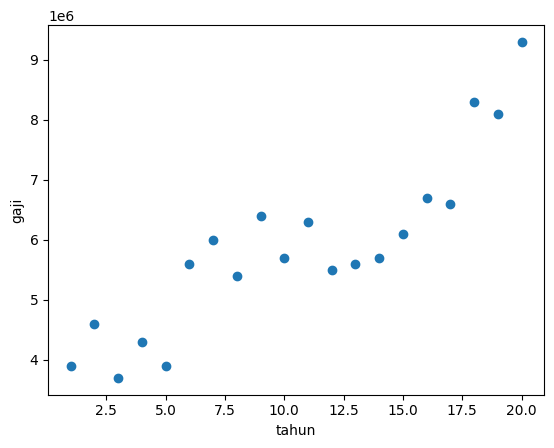

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['tahun_berkerja'], df['gaji'])
plt.xlabel('tahun')
plt.ylabel('gaji')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
X_train

array([[11],
       [17],
       [15],
       [19],
       [ 1],
       [ 6],
       [13],
       [ 5],
       [ 9],
       [14],
       [10],
       [16],
       [20],
       [ 7],
       [18],
       [12]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

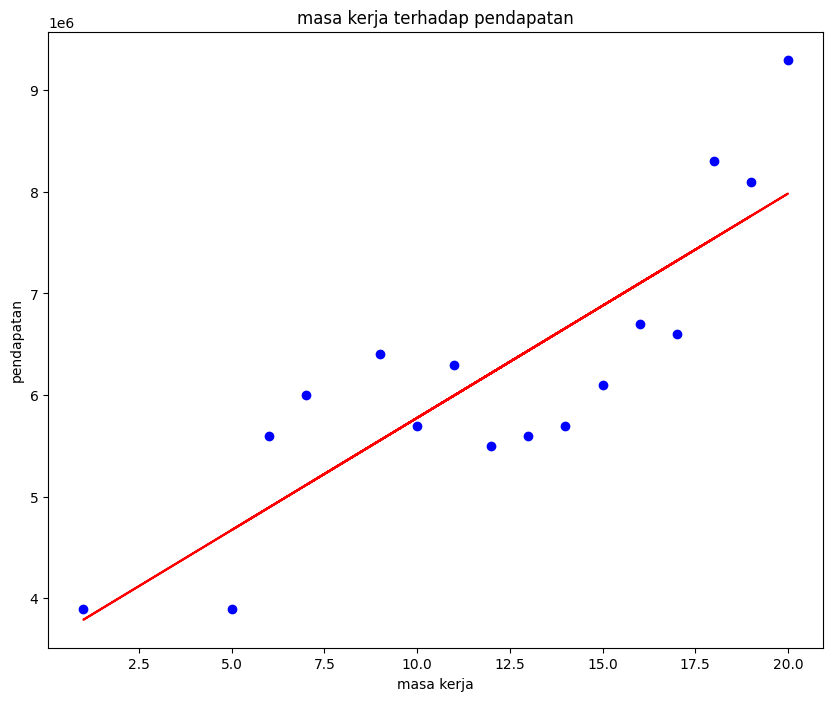

In [ ]:
plt.figure(figsize=(10,8))

#warna biru data observasi dari data asli
plt.scatter(X_train, y_train, color='blue')

#garis merah adalah prediksi dari machine learning
plt.plot(X_train, model.predict(X_train), color='red')

#pemberian nama judul dan label
plt.title('masa kerja terhadap pendapatan')
plt.xlabel('masa kerja')
plt.ylabel('pendapatan')
plt.show()